In [35]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [38]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [39]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [40]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [41]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [42]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [43]:
#Get a list of column names and types
#columns = inspector.get_columns('ea')
#for c in columns:
#    print(c['name'], c["type"])

In [44]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [ ]:
# Using the inspector to print the column names
# columns = inspector.get_columns('dow')
# for column in columns:
#    print(column["name"], column["type"])

In [88]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [45]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [89]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
end_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
end_date
# Calculate the date one year from the last date in data set.

#start_date = dt.date(2017,8,23)- dt.timedelta(years=1)
start_date = dt.date(2017,8,23)- dt.timedelta(days=365)
start_date

datetime.date(2016, 8, 23)

In [92]:
# Perform a query to retrieve the data and precipitation scores
query = [measurement.date,measurement.prcp]
weather_data = session.query(*query).filter(measurement.date >= start_date).all()

weather_df = pd.DataFrame(weather_data, columns=['date', 'prcp'])
weather_df.head()

,date,prcp
0,2016-08-23,0.0
1,2016-08-24,2.0
2,2016-08-25,2.0
3,2016-08-26,0.0
4,2016-08-27,0.0


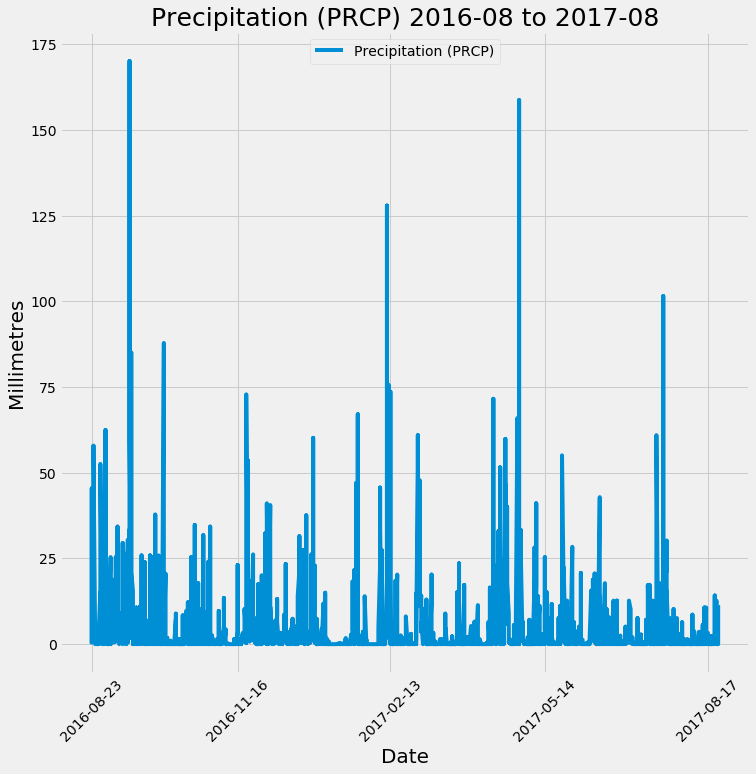

In [97]:
# Save the query results as a Pandas DataFrame and set the index to the date column
#weather_df = pd.DataFrame(weather_data, columns=['date', 'prcp'])
# Sort the dataframe by date
weather_df = weather_df.sort_values(by='date').dropna()
weather_df
# Use Pandas Plotting with Matplotlib to plot the data
x = weather_df['date']
y = weather_df['prcp']
plt.figure(figsize=(11,11))
plt.plot(x,y)
plt.title('Precipitation (PRCP) 2016-08 to 2017-08',fontsize=25)
plt.legend(['Precipitation (PRCP)'], loc='upper center')
plt.xlabel('Date', fontsize=20)
plt.xticks(x[::500],  rotation=45)
plt.ylabel('Millimetres', fontsize=20)
plt.show()


In [102]:
# Use Pandas to calcualte the summary statistics for the precipitation data
round(weather_df.describe(),2)

,prcp
count,2021.00
mean,4.51
std,11.71
min,0.00
25%,0.00
50%,0.50
75%,3.30
max,170.20


# Exploratory Station Analysis

In [32]:
session.query(station.station, station.name).all()

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [30]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.id)).all()

[(9,)]

In [33]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
query_2 = [measurement.station, func.count(measurement.station)]

station_stats = session.query(*query_2).\
    group_by(measurement.station).all()
station_stats

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [ ]:
# ('USC00519281', 'WAIHEE 837.5, HI US')
# ('USC00519281', 2772)

In [75]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query_3 = [measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]

WAIHEE_stats = session.query(*query_3).filter(measurement.station == 'USC00519281').all()

WAIHEE_stats_df = round(pd.DataFrame(WAIHEE, columns=['station', 'lowest', 'highest', 'average']),2)
WAIHEE_stats_df

,station,lowest,highest,average
0,USC00519281,12.2,29.4,22.04


In [79]:
# Using the most active station id
    # ('USC00519281', 'WAIHEE 837.5, HI US')
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_4 = [measurement.date, measurement.tobs]

start_date = dt.date(2017,8,18)- dt.timedelta(days=365)

WAIHEE_stats2 = session.query(*query_4).filter(measurement.station == 'USC00519281').\
                                        filter(measurement.date >= start_date).all()

WAIHEE_stats2_df = pd.DataFrame(WAIHEE_stats2, columns=['date', 'tobs'])
WAIHEE_stats2_df

,date,tobs
0,2016-08-18,26.7
1,2016-08-19,26.1
2,2016-08-20,27.2
3,2016-08-21,26.1
4,2016-08-22,25.6
...,...,...
352,2017-08-14,25.0
353,2017-08-15,25.0
354,2017-08-16,24.4
355,2017-08-17,24.4


In [73]:
# Latest Date
session.query(func.max(measurement.date)).filter(measurement.station == 'USC00519281').all()

[('2017-08-18',)]

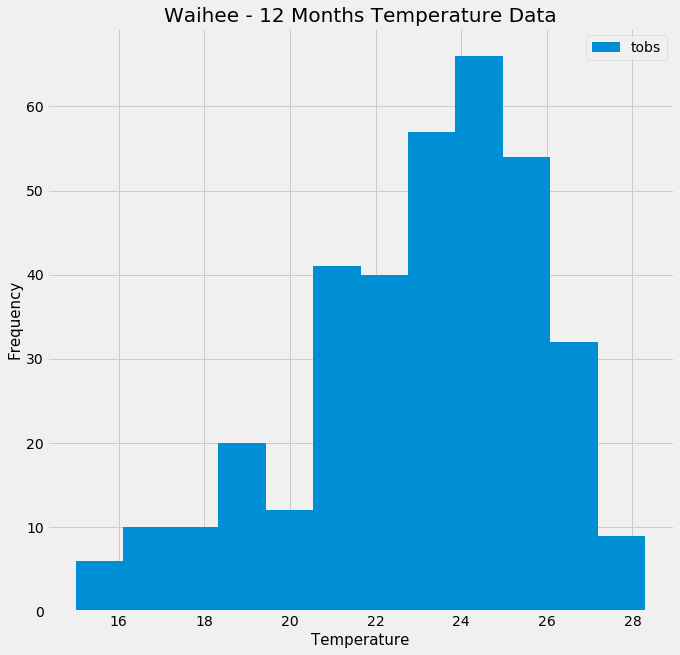

In [103]:
plt.figure(figsize=(10, 10))
plt.hist(WAIHEE_stats2_df['tobs'], bins=12)
plt.legend(['tobs'], loc='upper right')
plt.title("Waihee - 12 Months Temperature Data", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Temperature", fontsize=15)
plt.show()

# Close session

In [ ]:
# Close Session
session.close()